In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy.special as special
import scipy.integrate as integrate
import matplotlib.pyplot as plt
# fake beta function
def special_beta(alpha, beta): return special.gamma(alpha)*special.gamma(beta)/special.gamma(alpha+beta)

In [2]:
import eko.dglap as dglap
import eko.interpolation as interpolation
import eko.mellin as mellin

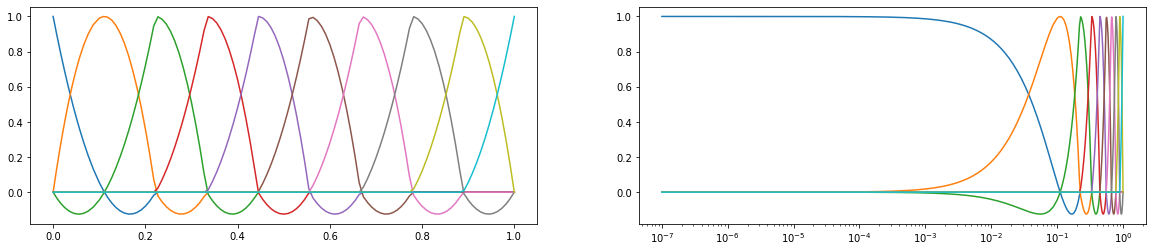

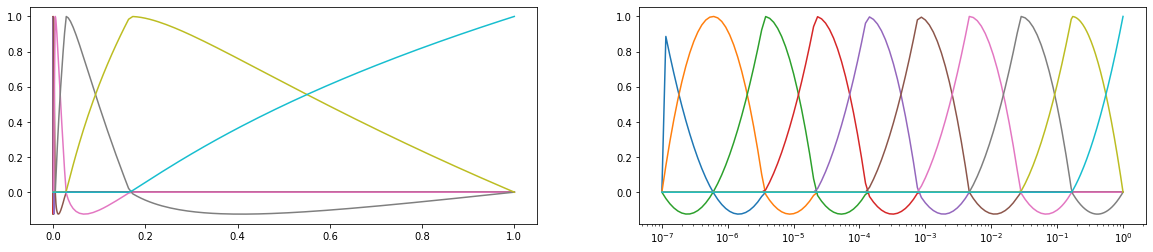

In [3]:
def plot_Lagrange_basis_functions(cnfs,evaluate,xmin=1e-7,title=None):
    xs = np.append(np.logspace(np.log10(xmin),-1,num=100),np.linspace(0.1,1.,num=100))
    ys_list = []
    for j,polynom_conf in enumerate(cnfs):
        ys_list.append([evaluate(x,polynom_conf) for x in xs])

    fig = plt.figure(figsize=(20,4))
    if title is not None:
        plt.suptitle(title)
    plt.subplot(1,2,1)
    for ys in ys_list:
        plt.plot(xs,ys)
    plt.subplot(1,2,2)
    for ys in ys_list:
        plt.semilogx(xs,ys)
    return fig

plot_Lagrange_basis_functions(interpolation.get_Lagrange_basis_functions(np.linspace(0,1,num=10),2),interpolation.evaluate_Lagrange_basis_function_x);
plot_Lagrange_basis_functions(interpolation.get_Lagrange_basis_functions_log(np.logspace(-7,0,num=10),2),interpolation.evaluate_Lagrange_basis_function_log_x);

[{'polynom_number': 0, 'areas': [{'coeffs': array([-1.        , -0.21714724]), 'xmin': -9.210340371976182, 'xmax': -4.605170185988091}]}, {'polynom_number': 1, 'areas': [{'coeffs': array([2.        , 0.21714724]), 'xmin': -9.210340371976182, 'xmax': -4.605170185988091}, {'coeffs': array([-0.        , -0.21714724]), 'xmin': -4.605170185988091, 'xmax': 0.0}]}, {'polynom_number': 2, 'areas': [{'coeffs': array([1.        , 0.21714724]), 'xmin': -4.605170185988091, 'xmax': 0.0}]}]
1.0
0.0
0.0


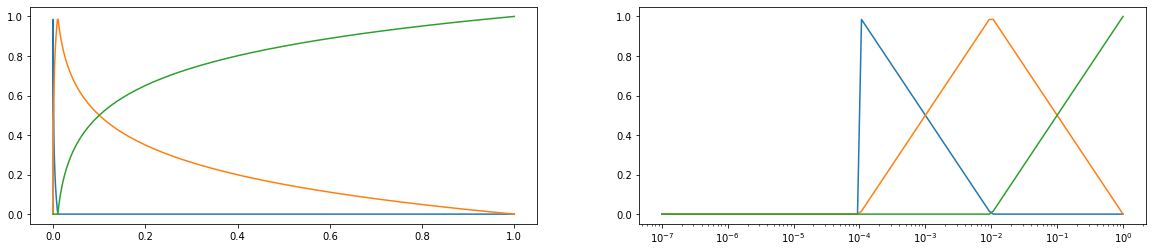

In [38]:
xgrid = np.array([1e-4,1e-2,1])
confs=interpolation.get_Lagrange_basis_functions_log(xgrid,1)
plot_Lagrange_basis_functions(confs,interpolation.evaluate_Lagrange_basis_function_log_x);
print(confs)
print(interpolation.evaluate_Lagrange_basis_function_log_x(1e-4,confs[0]))
print(interpolation.evaluate_Lagrange_basis_function_log_x(1e-4,confs[1]))
print(interpolation.evaluate_Lagrange_basis_function_log_x(1e-4,confs[2]))

In [4]:
def get_toy_pdf_x(alpha, beta):
    """test fnc in x"""
    return lambda x,alpha=alpha,beta=beta: x**alpha * (1-x)**beta
def get_toy_pdf_N(alpha, beta):
    return lambda N: special_beta(N+alpha,beta+1)

In [5]:
def plot_dist(x,y,yref,title=None):
    """compare to distributions both in linear and logarithmic x-space"""
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(hspace=0.05)
    if title is not None:
       fig.suptitle(title)
    # small x
    ax1 = plt.subplot(2,3,1)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.title("small x")
    plt.loglog(x,y,"o")
    plt.loglog(x,yref,"x")
    plt.subplot(2,3,4,sharex=ax1)
    plt.loglog(x,np.abs((y - yref)/yref),"x")
    plt.xlabel("x")
    # linear x
    ax2 = plt.subplot(2,3,2)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.title("linear x")
    plt.plot(x,y,"o")
    plt.plot(x,yref,"x")
    plt.subplot(2,3,5,sharex=ax2)
    plt.semilogy(x,np.abs((y - yref)/yref),"x")
    plt.xlabel("x")
    # large x
    ax3 = plt.subplot(2,3,3)
    oMx = 1.0 - x
    plt.setp(ax3.get_xticklabels(), visible=False)
    oMx_min = 1e-2
    oMx_max = 0.5
    ax3.set_xlim(oMx_min,oMx_max)
    plt.title("large x, i.e. small (1-x)")
    plt.loglog(oMx,y,"o")
    plt.loglog(oMx,yref,"x")
    ax = plt.subplot(2,3,6,sharex=ax3)
    plt.loglog(oMx,np.abs((y - yref)/yref),"x")
    plt.xlabel("1-x")
    return fig

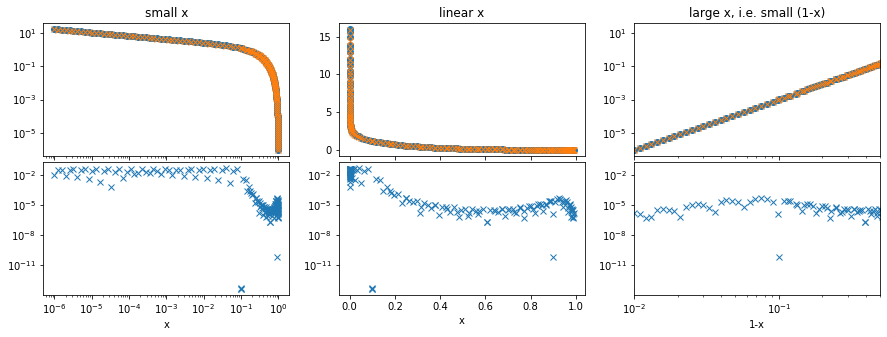

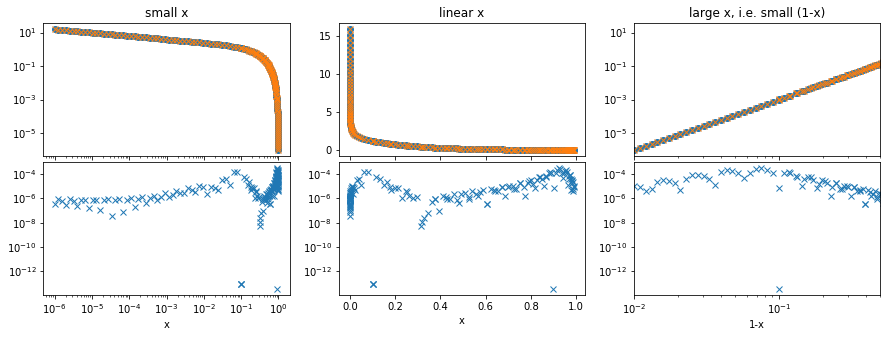

In [6]:
def test_interpolation_x(f,get_confs,xgrid,polynom_rank,evaluate,xmin=1e-6,title=None):
    """plots interpolation vs real thing in x"""
    confs = get_confs(xgrid,polynom_rank)
    fs = [f(x) for x in xgrid]
    fp = lambda y,confs=confs,fs=fs: np.sum([fs[j]*evaluate(y,confs[j]) for j in range(len(confs))])

    oMx = 1.0 - np.logspace(-2,np.log10(.9))
    xs = np.append(np.logspace(np.log10(xmin),-1),[np.linspace(0.1,.9),oMx])
    xs = np.sort(xs)
    yref = np.array([f(x) for x in xs])
    y = np.array([fp(x) for x in xs])

    return plot_dist(xs,y,yref,title=title)

toy_alpha = -0.2
toy_beta = 3.0
xgrid_low = interpolation.get_xgrid_linear_at_log(20,1e-7,0.1)
xgrid_mid = interpolation.get_xgrid_linear_at_id(20,0.1,0.9)
xgrid_high = 1.0-interpolation.get_xgrid_linear_at_log(10,1e-3,1.0 - 0.9)
xgrid = np.unique(np.concatenate((xgrid_low,xgrid_mid,xgrid_high)))
polynom_rank = 4
test_interpolation_x(get_toy_pdf_x(toy_alpha,toy_beta),interpolation.get_Lagrange_basis_functions,    xgrid,polynom_rank,interpolation.evaluate_Lagrange_basis_function_x);
test_interpolation_x(get_toy_pdf_x(toy_alpha,toy_beta),interpolation.get_Lagrange_basis_functions_log,xgrid,polynom_rank,interpolation.evaluate_Lagrange_basis_function_log_x);

In [7]:
# test Mellin transformation
def test_mellin_correspondence(confs,evaluate_x,evaluate_N):
    for k,conf in enumerate(confs):
        def ker(x):
            return evaluate_x(x,conf)
        for Nref in [1,2]:#,3,np.complex(2,2),np.complex(2,-2)]:
            Nref = np.complex(Nref)
            e = evaluate_N(Nref,conf,0)
            e = np.complex(e)
            i,ie = mellin.mellin_transform(ker,Nref)
            err_type = "abs_err" if e == 0. else "rel_err"
            err = np.abs(i) if e == 0 else np.abs((e-i)/e)
            is_ok = "!!! don't match"
            if np.abs(e - i) < ie:
                is_ok = "ok"
            elif err < 1e-6:
                is_ok = "okish"
            print(f"polynom #{k:02d} at N={Nref}:\texact = {e: .3e},\tint = ({i: .3e})+-({ie:.2e}),\t|{err_type}| = {err:.3e} \t{is_ok}")

In [12]:
test_mellin_correspondence(interpolation.get_Lagrange_basis_functions(np.linspace(0,1,num=10),3),interpolation.evaluate_Lagrange_basis_function_x,interpolation.evaluate_Lagrange_basis_function_N)

polynom #00 at N=(1+0j):	exact =  3.704e-02+0.000e+00j,	int = ( 3.704e-02+0.000e+00j)+-(3.89e-09+0.00e+00j),	|rel_err| = 1.403e-09 	ok
polynom #00 at N=(2+0j):	exact =  5.487e-04+0.000e+00j,	int = ( 5.487e-04+0.000e+00j)+-(8.63e-10+0.00e+00j),	|rel_err| = 2.104e-08 	ok
polynom #01 at N=(1+0j):	exact =  1.435e-01+0.000e+00j,	int = ( 1.435e-01+0.000e+00j)+-(2.27e-11+0.00e+00j),	|rel_err| = 2.804e-14 	ok
polynom #01 at N=(2+0j):	exact =  1.355e-02+0.000e+00j,	int = ( 1.355e-02+0.000e+00j)+-(7.51e-10+0.00e+00j),	|rel_err| = 3.893e-11 	ok
polynom #02 at N=(1+0j):	exact =  9.259e-02+0.000e+00j,	int = ( 9.259e-02+0.000e+00j)+-(6.51e-11+0.00e+00j),	|rel_err| = 1.365e-13 	ok
polynom #02 at N=(2+0j):	exact =  2.373e-02+0.000e+00j,	int = ( 2.373e-02+0.000e+00j)+-(1.08e-10+0.00e+00j),	|rel_err| = 1.212e-09 	ok
polynom #03 at N=(1+0j):	exact =  1.157e-01+0.000e+00j,	int = ( 1.157e-01+0.000e+00j)+-(1.35e-08+0.00e+00j),	|rel_err| = 1.038e-12 	ok
polynom #03 at N=(2+0j):	exact =  3.728e-02+0.000e+00j,

In [13]:
test_mellin_correspondence(interpolation.get_Lagrange_basis_functions_log(np.logspace(-1,0,num=10),3),interpolation.evaluate_Lagrange_basis_function_log_x,interpolation.evaluate_Lagrange_basis_function_log_N)

polynom #00 at N=(1+0j):	exact =  8.773e-03+0.000e+00j,	int = ( 8.773e-03+0.000e+00j)+-(7.17e-09+0.00e+00j),	|rel_err| = 5.661e-08 	ok
polynom #00 at N=(2+0j):	exact =  8.878e-04+0.000e+00j,	int = ( 8.878e-04+0.000e+00j)+-(1.13e-09+0.00e+00j),	|rel_err| = 1.125e-07 	ok
polynom #01 at N=(1+0j):	exact =  4.121e-02+0.000e+00j,	int = ( 4.121e-02+0.000e+00j)+-(5.43e-09+0.00e+00j),	|rel_err| = 4.935e-08 	ok
polynom #01 at N=(2+0j):	exact =  5.165e-03+0.000e+00j,	int = ( 5.165e-03+0.000e+00j)+-(1.20e-08+0.00e+00j),	|rel_err| = 4.402e-08 	ok
polynom #02 at N=(1+0j):	exact =  3.786e-02+0.000e+00j,	int = ( 3.786e-02+0.000e+00j)+-(1.32e-08+0.00e+00j),	|rel_err| = 8.177e-08 	ok
polynom #02 at N=(2+0j):	exact =  6.566e-03+0.000e+00j,	int = ( 6.566e-03+0.000e+00j)+-(1.02e-08+0.00e+00j),	|rel_err| = 4.367e-10 	ok
polynom #03 at N=(1+0j):	exact =  5.632e-02+0.000e+00j,	int = ( 5.632e-02+0.000e+00j)+-(4.05e-09+0.00e+00j),	|rel_err| = 4.058e-08 	ok
polynom #03 at N=(2+0j):	exact =  1.200e-02+0.000e+00j,

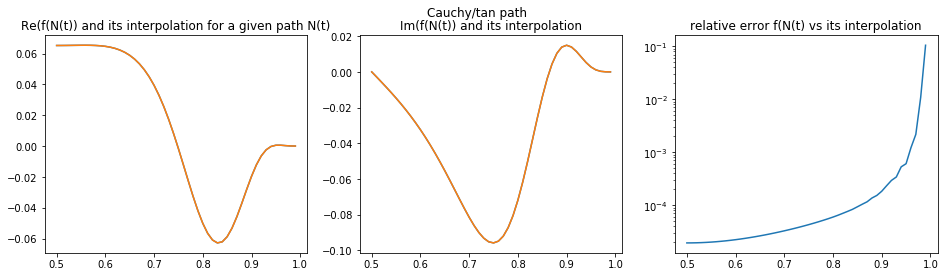

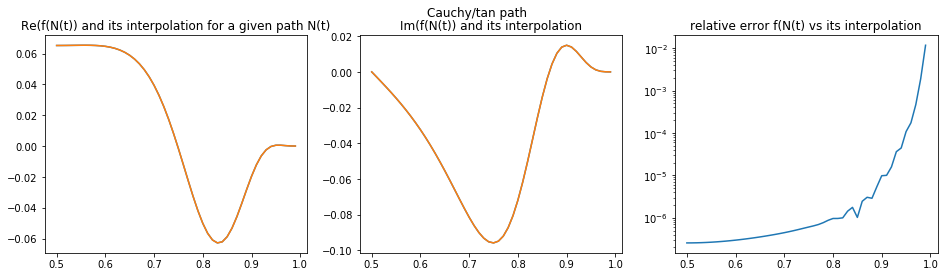

In [16]:
def test_interpolation_N(fx,fN,get_confs,xgrid,polynom_rank,evaluate_N,path,ts = np.linspace(0,1),title=None):
    """plots interpolation to real thing in x"""
    confs = get_confs(xgrid,polynom_rank)
    fxs = [fx(x) for x in xgrid]
    fNp = lambda N,confs=confs,fxs=fxs: np.sum([fxs[j]*evaluate_N(N,confs[j],0) for j in range(len(confs))])

    fig = plt.figure(figsize=(16,4))
    if not title == None:
        plt.suptitle(title)
    plt.subplot(1,3,1)
    plt.title("Re(f(N(t)) and its interpolation for a given path N(t)")
    ys = [fN(path(t)) for t in ts]
    yps = [fNp(path(t)) for t in ts]
    plt.plot(ts,np.real(ys))
    plt.plot(ts,np.real(yps))
    plt.subplot(1,3,2)
    plt.title("Im(f(N(t)) and its interpolation")
    plt.plot(ts,np.imag(ys))
    plt.plot(ts,np.imag(yps))
    plt.subplot(1,3,3)
    plt.title("relative error f(N(t) vs its interpolation")
    plt.semilogy(ts,[np.abs((ys[j] - yps[j])/ys[j]) for j in range(len(ts))])
    plt.show()
    return fig

toy_alpha = -0.2
toy_beta = 3.0
xgrid_low = interpolation.get_xgrid_linear_at_log(50,1e-7,0.1)
xgrid_mid = interpolation.get_xgrid_linear_at_id(40,0.1,0.9)
xgrid_high = 1.0-interpolation.get_xgrid_linear_at_log(50,1e-3,1.0 - 0.9)
xgrid = np.unique(np.append(np.append(xgrid_low,xgrid_mid),xgrid_high))
polynom_rank = 4

path,jac = mellin.get_path_line(15)
#test_interpolation_N(get_toy_pdf_x(toy_alpha,toy_beta), get_toy_pdf_N(toy_alpha,toy_beta),xgrid,polynom_rank, path,np.linspace(.01,.5),title="line path");

path,jac = mellin.get_path_edge(20.0,2.0)
#test_interpolation_N(get_toy_pdf_x(toy_alpha,toy_beta), get_toy_pdf_N(toy_alpha,toy_beta),xgrid,polynom_rank, path,np.linspace(.01,.5),title="edge path");

path,jac = mellin.get_path_Talbot(1.0)
#test_interpolation_N(get_toy_pdf_x(toy_alpha,toy_beta), get_toy_pdf_N(toy_alpha,toy_beta),xgrid,polynom_rank, path,np.linspace(.1,.5),title="Talbot path");

#path,jac = mellin.get_path_Cauchy_tan(1.0)
#test_interpolation_N(get_toy_pdf_x(toy_alpha,toy_beta), get_toy_pdf_N(toy_alpha,toy_beta),interpolation.get_Lagrange_basis_functions,xgrid,polynom_rank,interpolation.evaluate_Lagrange_basis_function_N,path,np.linspace(.5,1.-1e-2),title="Cauchy/tan path");
path,jac = mellin.get_path_Cauchy_tan(1.0,1.0)
test_interpolation_N(get_toy_pdf_x(toy_alpha,toy_beta), get_toy_pdf_N(toy_alpha,toy_beta),interpolation.get_Lagrange_basis_functions,xgrid,polynom_rank,interpolation.evaluate_Lagrange_basis_function_N,path,np.linspace(.5,1.-1e-2),title="Cauchy/tan path");

path,jac = mellin.get_path_Cauchy_tan(1.0,1.0)
test_interpolation_N(get_toy_pdf_x(toy_alpha,toy_beta), get_toy_pdf_N(toy_alpha,toy_beta),interpolation.get_Lagrange_basis_functions_log,xgrid,polynom_rank,interpolation.evaluate_Lagrange_basis_function_log_N,path,np.linspace(.5,1.-1e-2),title="Cauchy/tan path");

In [24]:
def test_inverse_Mellin_transform(fx,fN,path,jac,cut=0.,xmin=1e-6,title=None,num_total=100,oMx_min=1e-2):
    """plot Mellin integration path and compare numeric inversion to real thing"""
    oMx = 1.0 - np.logspace(np.log10(oMx_min),np.log10(.9),num=num_total//3,endpoint=False)
    xs = np.concatenate((np.logspace(np.log10(xmin),-1,num=num_total - 2*(num_total//3)),np.linspace(0.1,.9,num=num_total//3),oMx))
    xs = np.unique(xs)
    ys = []
    yps = []
    def get_ker(x):
        return lambda N: fN(N,np.log(x))
    for x in xs:
        yp,ype = mellin.inverse_mellin_transform(get_ker(x),path,jac,cut)
        yps.append(yp)
        y = fx(x)
        ys.append(y)
        rel_err = np.abs((yp - y)/y)
        print(f"x = {x:.3e}\ty = {y:.3e}\typ = {yp:.3e}+-{ype:.3e}\t|rel_err| = {rel_err:.3e}")

    return plot_dist(xs,np.array(yps),np.array(ys),title=title)

/home/felix/Physik/N3PDF/EKO/eko/src/eko/mellin.py:50: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  result = integrate.quad(integrand, 0.5, 1.0 - cut,epsabs=1e-11,epsrel=1e-11,limit=100)
x = 1.000e-06	y = 1.585e+01	yp = 1.887e+03+-1.210e+04	|rel_err| = 1.180e+02
x = 4.642e-05	y = 7.355e+00	yp = 2.274e+01+-2.063e+02	|rel_err| = 2.091e+00
/home/felix/Physik/N3PDF/EKO/eko/src/eko/mellin.py:50: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result = integrate.quad(integrand, 0.5, 1.0 - cut,epsabs=1e-11,epsrel=1e-11,limit=1

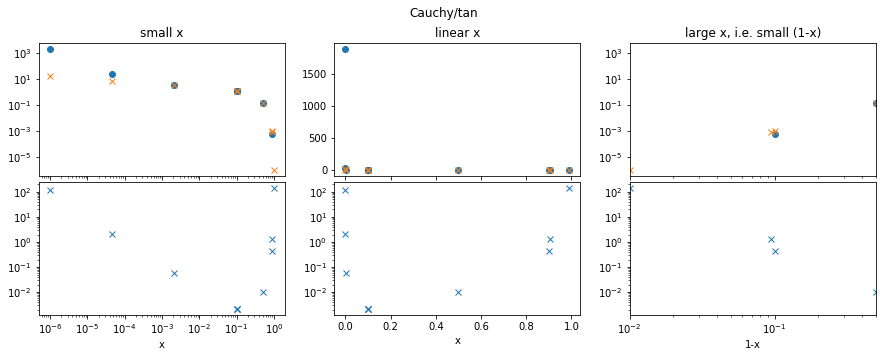

In [23]:
def test_inv_interpolation_x(fx,xgrid,polynom_rank,path,jac,cut=0.,title=None,num_total=100, xmin=1e-6, oMx_min=1e-2):
    """compare interpolated numeric inversion to real thing"""
    confs = interpolation.get_Lagrange_basis_functions(xgrid,polynom_rank)
    fxs = [fx(x) for x in xgrid]
    fNp = lambda N,lnx,confs=confs,fxs=fxs: np.sum([fxs[j]*interpolation.evaluate_Lagrange_basis_function_N(N,confs[j],lnx) for j in range(len(confs))])

    return test_inverse_Mellin_transform(fx,fNp,path,jac,cut,title=title,num_total=num_total, xmin=xmin, oMx_min=oMx_min)


toy_alpha = -0.2
toy_beta = 3.0
xgrid_low = interpolation.get_xgrid_linear_at_log(15,1e-7,0.1)
xgrid_mid = interpolation.get_xgrid_linear_at_id(10,0.1,1.0)
#xgrid_high = 1.0-interpolation.get_xgrid_linear_at_log(40,1e-4,1.0 - 0.9)
xgrid = np.unique(np.concatenate((xgrid_low,xgrid_mid)))
polynom_rank = 4
path,jac = mellin.get_path_Cauchy_tan(1.0,1.0)
test_inv_interpolation_x(get_toy_pdf_x(toy_alpha,toy_beta),xgrid,polynom_rank,path,jac,title="Cauchy/tan",num_total=10,cut=1e-2);